## Random variable 

Taken from https://www.r-bloggers.com/using-r-for-introductory-statistics-chapter-5/

A random number drawn from a population. A random variable is a variable for which we define a range of possible values and a probability distribution. The probability distribution specifies the probability that the variable assumes any value in its range.
The range of a discrete random variable is a finite list of values. For any value k in the range, 0 ≤ P(X=k) ≤ 1. The sum over all values k in the range is 1.

R sample function implements these definitions. For example, let’s ask R to create a six-sided die for us.

In [1]:
p.die <- rep(1/6,6)
sum(p.die)

[1] 1

Now, let’s roll it 10 times. (run this cell several times)

In [2]:
die <- 1:6
sample(die, size=10, prob=p.die, replace=T)

[1] 6 5 1 6 2 2 5 1 5 2

Now, let’s roll 1000 dice and plot the results.

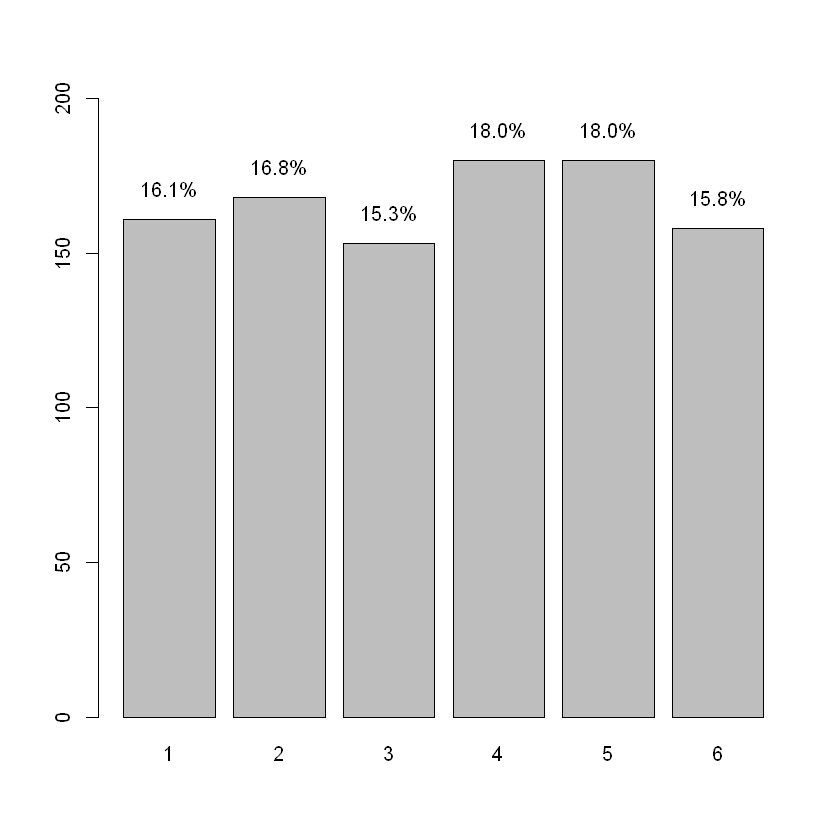

In [3]:
s <- table(sample(die, size=1000, prob=p.die, replace=T))
lbls = sprintf("%0.1f%%", s/sum(s)*100)
barX <- barplot(s, ylim=c(0,200))
text(x=barX, y=s+10, label=lbls)

### Expected value

Expected value (or population mean) of a discrete random variable X is the weighted average of the values in the range of X.
In the case of our six-sided die, the expected value is 3.5, computed like so:

In [4]:
sum(die*p.die)

[1] 3.5

Things change a bit when we move from discrete to continuous random variables. A continuous random variable is described by a probability density function. If f(x) is the probability density of a random variable X, P(X≤b) is the area under f(x) and to the left of b. The total area under f(x) = 1. f(x) ≥ 0 for all possible values of X. P(X>b) = 1 – P(X≤b). The expected value is the balance point where exactly half of the total area under f(x) is to the right and half is to the left.

(If the image below doesn't show, you can see it here: https://i1.wp.com/4.bp.blogspot.com/_dbECP0yvozc/TTkuPr9-szI/AAAAAAAACy8/DdgGg9RoNIE/s400/p_x_lteq_b.png?w=456 )

Example: 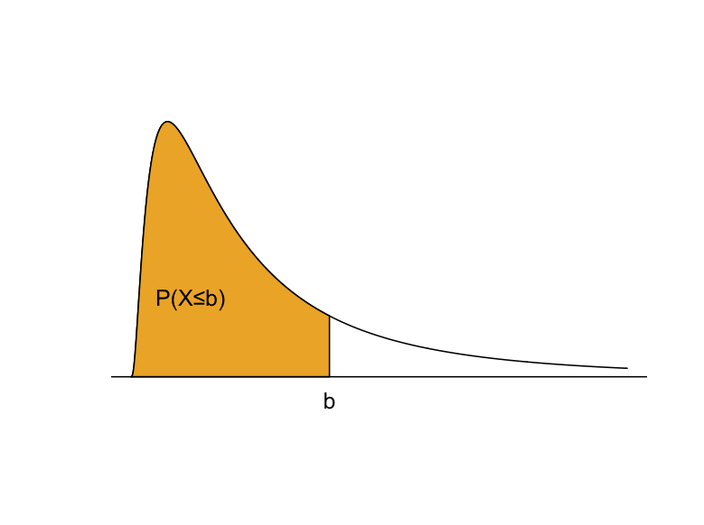

## Given this information, can you determine if the 6-side die is fair or biased? How could such a bias be calculated?

**A random sample** is a sequence of independent identically distributed random variables. A value derived from a random sample, such as sample mean, sample standard deviation, etc. is called a statistic. When we compute statistics of samples, our hope is that the sample statistic is not too far off from the equivalent measurement of the whole population.

The interesting thing is that derived statistics are also random variables. If we role our die several times, we have taken a random sample of size n. That sample can be summarized by computing its mean, denoted by X bar.

The sample mean is, itself, a random variable with its own distribution. So, let’s take a look at that distribution. Because we’ll use it later, let’s define a function that generates a bunch of samples of size n and computes their means. It returns a vector of sample means.

Run the following cell several times to see what happens.

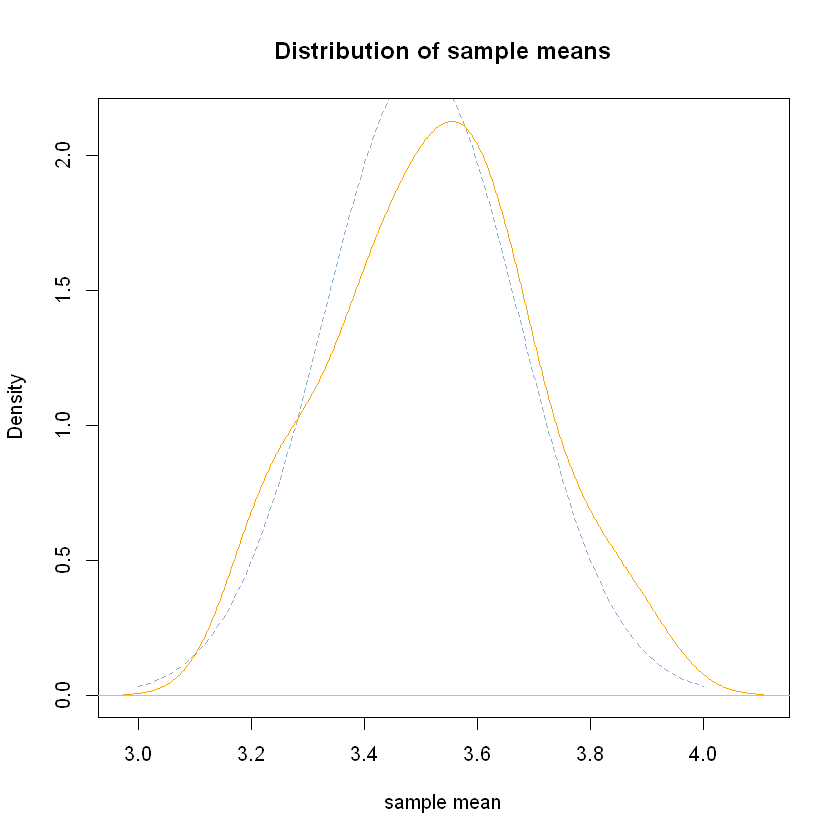

In [5]:
generate.sample.means <- function(n) {
  sample.means <- numeric()
  for (i in 1:50) { 
    sample.means <- append(sample.means, sum(sample(die, size=n, prob=p.die, replace=T))/n)
  }
  return (sample.means)
}
sample.means <- generate.sample.means(100)
plot(density(sample.means), main="Distribution of sample means",xlab="sample mean", col="orange")

# this overlays a normal curve in dashed blue lines
x = seq(3,4,0.01)
lines(x=x,y=dnorm(x,mean=3.5,sd=0.1707825), col=rgb(0x33,0x66,0xAA,0x90,maxColorValue=255), type="l", lty=2)

Not coincidentally, it fits pretty closely to a normal distribution (dashed blue line). It’s mean is about the same as the parent population, namely right around 3.5. The standard deviation of the sample means can be derived by dividing the standard deviation of the parent population by the square root of the sample size: σ / √ n.

Let’s compare the mean and sd of our sample with predicted values. We compute the standard deviation of our parent population of die rolls by squaring the deviation from the mean for each possible value and averaging that. Dividing that by the square root of our sample size gives the predicted sd of our sample means, about 0.17, which is about spot on with the actual sd.

In [6]:
mean(sample.means)

[1] 3.5204

In [7]:
sd(sample.means)

[1] 0.175138

In [8]:
sqrt(sum( (1:6-3.5)^2 ) / 6) / sqrt(100)

[1] 0.1707825

To overlay the normal distribution on the plot above, we used R’s dnorm function like this:

Inspection of the formula for the standard deviation of sample means supports our common sense intuition that a bigger sample will more likely reflect the whole population. In particular, as the size of our sample goes up, our estimated mean is more likely to be closer to the parent population mean. This idea is known as the law of large numbers. We can show that it works by creating similar plots with increasing n.

### The above plot shows 50 samples. Plot three new distributions using 100, 500, and 1000 samples. 

### What do you notice about your new plot? What do you think it means? 